# k-Space lab in Python

> **_NOTE:_**  Using generative AI to solve these problems, or to help write the lab report, is _not_ allowed.

This is an interactive Jupyter Notebook. The notebook consists of markdown cells (like this) and code cells. To edit a code cell, you just click in it and start typing. To execute code you can either click the Run button, or use the keyboard shortcut Shift + Enter.

If you're running the lab using Google Colab, there is a button above to save a copy of the notebook to your Google Drive.

This lab is making use of the NumPy (<a href="https://numpy.org/devdocs/user/quickstart.html">tutorial</a>) and PyPlot (<a href="https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html">tutorial</a>) packages.

A few tips for numpy:
* Numpy uses zero-based indexing, e.g. ``my_nparray[0]`` is the first element.
* Arrays can be sliced using the ``[start:stop:step]`` notation, e.g. ``my_nparray[::2]`` for every second element or ``my_nparray[0:20]`` for the 20 first elements.
* Before modifying a variable, it is a good idea to make a copy, e.g. ``my_kspace = kspace_res512_FOV24.copy()``, otherwise you might end up with unwanted results.
* If you want to initialize a zero matrix with ``np.zeros``, you need to specify that it's a complex datatype using ``dtype=np.complex64``
* The command ``np.log`` may give undesired results for arrays containing zeros. You can use ``np.log(x+1)`` for those instances.
* ``ij`` or ``0+ij`` can be used to represent complex numbers. ``np.pi`` can be used for pi.
* In numpy convention, the first dimension (axis=0) corresponds to rows and the second dimension (axis=1) corresponds to columns.

A few tips for matplotlib:
* Use ``plt.imshow`` to display images, and use the option ``cmap='gray'`` to display them in black and white.
* When the question calls for multiple plots, you can either use ``plt.figure()`` to create multiple plots or use ``fig, axes = plt.subplots(2,2)`` to create a 2 by 2 grid.
* If your figures appear too small, you can use ``figsize=(20,20)`` to make the plotting area larger, e.g. ``plt.figure(figsize=(20,20))`` or ``fig, axes = plt.subplots(2,2, figsize=(20,20))``

Finally, if you need to reset your workspace, run the first cell again!

In [1]:
"""RUN THIS CELL TO SETUP OR RESET THE ENVIRONMENT 
"""
!wget -nc https://raw.githubusercontent.com/fyrdahl/kspace-lab/master/data.h5

import numpy as np
import matplotlib.pyplot as plt
import h5py

from scipy.signal import convolve2d

with h5py.File('data.h5', 'r') as F:
    kspace_res512_FOV24 = np.array(F['kspace_res512_FOV24'])
    kspace_res512_FOV48 = np.array(F['kspace_res512_FOV48'])

fftc = lambda f: np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f, axes=0), axis=0), axes=0)
ifftc = lambda F: np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(F, axes=0), axis=0), axes=0)
fft2c = lambda f: np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
ifft2c = lambda F: np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(F)))

File ‘data.h5’ already there; not retrieving.



## Task 1

Use ``kspace_res512_FOV24``

1. Show the magnitude, phase, real, and imaginary part of the k-space. To better visualize the k-space, you could log the matrix using the ``np.log`` command.

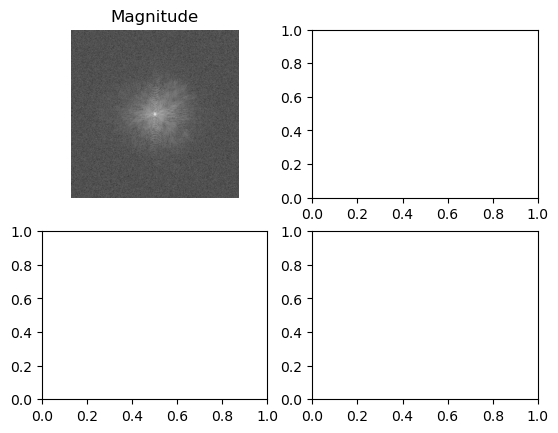

In [2]:
fig, axes = plt.subplots(2,2)
# Plot magnitude here
axes[0][0].imshow(np.abs(np.log(kspace_res512_FOV24)), cmap='gray')
axes[0][0].set_title('Magnitude')
axes[0][0].set_axis_off()

# Plot phase here

# Plot real part here

# Plot imaginary part here

plt.show()

2.  Do an inverse FT of the k-space data along one dimension (ifftc).
    * Display the magnitude and phase of the result.
    * Describe what happened, which domain is the data in – spatial or frequency?
    * What are the unit on the x and y axis?

AttributeError: AxesImage.set() got an unexpected keyword argument 'colormap'

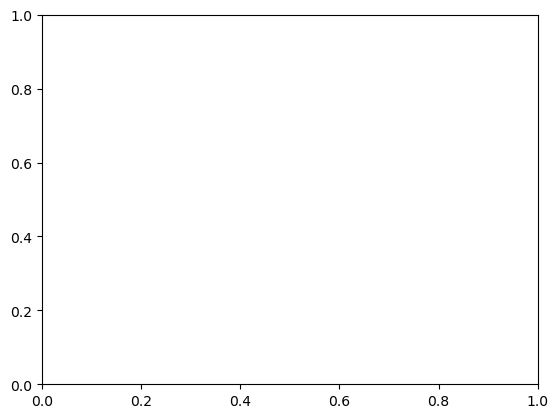

3. Do an inverse FT of the k-space data in both the frequency and phase encoding direction.
    * Display the magnitude and phase of the result.
    * Which domain is the data in – spatial or frequency?
    * Which dimension is most likely to be the phase encoding direction?

## Task 2

Use ``kspace_res512_FOV48``

1. Decrease the FOV in the spatial domain to 24x24 cm, and 16x16 cm by removing parts of k-space and show the results

## Task 3

Use ``kspace_res512_FOV24``

1. Decrease the spatial resolution by replacing k-space data with zeros before performing the ifft2c. The new images
should have a 512x256, 256x256, 64x64, 512x64 and 64x512 resolution. Display the magnitude of k-space and the magnitude image in the spatial domain. Remember that you should use ``np.log(x+1)`` when taking the "log" a matrix containing zeros.

2. What is the difference between the 512x64 and the 64x512 image? Describe the artifact that is appearing.

## Task 4

Use ``kspace_res512_FOV24``

1. Set the k-space element ``[kx,ky]`` to 200000 for each these elements: ``[100,100]``, ``[200,200]``, ``[250,250]``, ``[255,255]``, ``[257,257]``.  Display the image for _each_ k-space adjustment. Describe the artifact.
2. What is the correlation between the element you changed and how the artifact looks.
3. What kind of artifact do you think this could simulate?

Remember that numpy arrays are mutable. To create an image for _each_ k-space location, you need to use ``.copy()`` to create copies of the original array.

## Task 5

Use ``kspace_res512_FOV24``

Change the k-space phase without altering the magnitude. Remember that complex
numbers can be written as ``z = mag * np.exp(1j*phase)``

1. Increase the phase by 2 radians in the following k-space rows: 1–20, 201–220, 237–256 and 247–266. Display the magnitude image in the spatial domain for each k-space adjustment.
2. What kind of artifact do you think this could simulate?

## Task 6

Use ``kspace_res512_FOV24``

1. Filter the spatial image with a boxcar filter using two kernel sizes: 7x7 and 4x4.
3. Do an inverse Fourier transform and display the magnitude of k-space for each kernel size. Describe the results.

To define a boxcar filter, you can use ``filter = np.ones((n,n))``, then use ``convolve2d(image,filter)`` to perform a 2D convolution. 